In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib
import numpy as np
from scipy import stats
from datetime import date
from sodapy import Socrata
from IPython.display import display, HTML, Markdown, Javascript
pd.options.mode.chained_assignment = None  # default='warn'

In [176]:


# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cdc.gov", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cdc.gov,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

nc_results = client.get("g653-rqe2", where="key_plot_id IN ('NWSS_nc_1523_Treatment plant_raw wastewater', 'NWSS_nc_303_Treatment plant_raw wastewater', 'NWSS_nc_369_Treatment plant_raw wastewater', 'NWSS_nc_332_Treatment plant_raw wastewater', 'NWSS_nc_334_Treatment plant_raw wastewater', 'NWSS_nc_335_Treatment plant_raw wastewater', 'NWSS_nc_84_Treatment plant_raw wastewater', 'NWSS_nc_85_Treatment plant_raw wastewater', 'NWSS_nc_86_Treatment plant_raw wastewater')", limit=8000)

# Convert to pandas DataFrame
nc_ww_data = pd.DataFrame.from_records(nc_results)

In [177]:
with pd.option_context('display.max_rows', 30, 'display.max_columns', None):
    display(nc_ww_data)
    display(nc_ww_data.dtypes)

,key_plot_id,date,pcr_conc_smoothed,normalization
0,NWSS_nc_1523_Treatment plant_raw wastewater,2022-09-06,NaN,NaN
1,NWSS_nc_1523_Treatment plant_raw wastewater,2022-09-08,NaN,NaN
2,NWSS_nc_1523_Treatment plant_raw wastewater,2022-09-09,21900056.4215,flow-population
3,NWSS_nc_1523_Treatment plant_raw wastewater,2022-09-15,19779945.3384,flow-population
4,NWSS_nc_1523_Treatment plant_raw wastewater,2022-09-17,19064075.9120,flow-population
...,...,...,...,...
7126,NWSS_nc_86_Treatment plant_raw wastewater,2023-10-19,26172075.7720,flow-population
7127,NWSS_nc_86_Treatment plant_raw wastewater,2023-10-20,25441690.2328,flow-population
7128,NWSS_nc_86_Treatment plant_raw wastewater,2023-10-21,24709181.2793,flow-population
7129,NWSS_nc_86_Treatment plant_raw wastewater,2023-10-23,23234980.2578,flow-population


key_plot_id          object
date                 object
pcr_conc_smoothed    object
normalization        object
dtype: object

In [178]:
triangle_pops = pd.read_csv('triangle-counties-cdc-ww-metadata.csv')

In [179]:
pops_df = pd.DataFrame.from_records(populations, columns=['key_plot_id', 'population_served'])
with pd.option_context('display.max_rows', 30, 'display.max_columns', None):
    display(triangle_pops)

,key_plot_id,population_served
0,NWSS_nc_1523_Treatment plant_raw wastewater,142000
1,NWSS_nc_303_Treatment plant_raw wastewater,78141
2,NWSS_nc_369_Treatment plant_raw wastewater,108105
3,NWSS_nc_332_Treatment plant_raw wastewater,550000
4,NWSS_nc_334_Treatment plant_raw wastewater,30655
5,NWSS_nc_335_Treatment plant_raw wastewater,7776
6,NWSS_nc_84_Treatment plant_raw wastewater,84189
7,NWSS_nc_85_Treatment plant_raw wastewater,74331
8,NWSS_nc_86_Treatment plant_raw wastewater,75886


In [180]:
nc_ww_data_enriched = nc_ww_data.merge(triangle_pops, how='left', left_on='key_plot_id', right_on='key_plot_id')

In [181]:
with pd.option_context('display.max_rows', 30, 'display.max_columns', None):
    display(nc_ww_data_enriched)

,key_plot_id,date,pcr_conc_smoothed,normalization,population_served
0,NWSS_nc_1523_Treatment plant_raw wastewater,2022-09-06,NaN,NaN,142000
1,NWSS_nc_1523_Treatment plant_raw wastewater,2022-09-08,NaN,NaN,142000
2,NWSS_nc_1523_Treatment plant_raw wastewater,2022-09-09,21900056.4215,flow-population,142000
3,NWSS_nc_1523_Treatment plant_raw wastewater,2022-09-15,19779945.3384,flow-population,142000
4,NWSS_nc_1523_Treatment plant_raw wastewater,2022-09-17,19064075.9120,flow-population,142000
...,...,...,...,...,...
7126,NWSS_nc_86_Treatment plant_raw wastewater,2023-10-19,26172075.7720,flow-population,75886
7127,NWSS_nc_86_Treatment plant_raw wastewater,2023-10-20,25441690.2328,flow-population,75886
7128,NWSS_nc_86_Treatment plant_raw wastewater,2023-10-21,24709181.2793,flow-population,75886
7129,NWSS_nc_86_Treatment plant_raw wastewater,2023-10-23,23234980.2578,flow-population,75886


In [182]:
nc_ww_data_enriched = nc_ww_data_enriched.dropna()
nc_ww_data_enriched['pcr_conc_smoothed'] = pd.to_numeric(nc_ww_data_enriched['pcr_conc_smoothed'])
nc_ww_data_enriched = nc_ww_data_enriched[nc_ww_data_enriched['pcr_conc_smoothed'] > 0]
nc_ww_data_enriched['date'] = pd.to_datetime(nc_ww_data_enriched['date'])
nc_ww_data_enriched = nc_ww_data_enriched[(nc_ww_data_enriched['date'] > '2023-01-01')]
with pd.option_context('display.max_rows', 30, 'display.max_columns', None):
    display(nc_ww_data_enriched.dtypes)
    display(nc_ww_data_enriched)

key_plot_id                  object
date                 datetime64[ns]
pcr_conc_smoothed           float64
normalization                object
population_served             int64
dtype: object

,key_plot_id,date,pcr_conc_smoothed,normalization,population_served
61,NWSS_nc_1523_Treatment plant_raw wastewater,2023-01-02,7.004257e+07,flow-population,142000
62,NWSS_nc_1523_Treatment plant_raw wastewater,2023-01-03,6.961648e+07,flow-population,142000
63,NWSS_nc_1523_Treatment plant_raw wastewater,2023-01-05,6.824966e+07,flow-population,142000
64,NWSS_nc_1523_Treatment plant_raw wastewater,2023-01-06,6.737091e+07,flow-population,142000
65,NWSS_nc_1523_Treatment plant_raw wastewater,2023-01-07,6.640240e+07,flow-population,142000
...,...,...,...,...,...
7125,NWSS_nc_86_Treatment plant_raw wastewater,2023-10-18,2.690104e+07,flow-population,75886
7126,NWSS_nc_86_Treatment plant_raw wastewater,2023-10-19,2.617208e+07,flow-population,75886
7127,NWSS_nc_86_Treatment plant_raw wastewater,2023-10-20,2.544169e+07,flow-population,75886
7128,NWSS_nc_86_Treatment plant_raw wastewater,2023-10-21,2.470918e+07,flow-population,75886


In [183]:
nc_ww_data_enriched['year'] = nc_ww_data_enriched['date'].dt.isocalendar().year
nc_ww_data_enriched['week'] = nc_ww_data_enriched['date'].dt.isocalendar().week
#nc_ww_data_enriched_filtered = nc_ww_data_enriched[nc_ww_data_enriched['pcr_conc_smoothed'].transform(lambda x : (x<x.quantile(0.99))&(x>(x.quantile(0.01)))).eq(1)]
nc_ww_data_enriched_filtered = nc_ww_data_enriched
nc_ww_data_enriched_filtered['copies'] = nc_ww_data_enriched_filtered['population_served'] * nc_ww_data_enriched_filtered['pcr_conc_smoothed']

with pd.option_context('display.max_rows', 30, 'display.max_columns', None):
    display(nc_ww_data_enriched_filtered.dtypes)
    display(nc_ww_data_enriched_filtered)

key_plot_id                  object
date                 datetime64[ns]
pcr_conc_smoothed           float64
normalization                object
population_served             int64
year                         UInt32
week                         UInt32
copies                      float64
dtype: object

,key_plot_id,date,pcr_conc_smoothed,normalization,population_served,year,week,copies
61,NWSS_nc_1523_Treatment plant_raw wastewater,2023-01-02,7.004257e+07,flow-population,142000,2023,1,9.946045e+12
62,NWSS_nc_1523_Treatment plant_raw wastewater,2023-01-03,6.961648e+07,flow-population,142000,2023,1,9.885541e+12
63,NWSS_nc_1523_Treatment plant_raw wastewater,2023-01-05,6.824966e+07,flow-population,142000,2023,1,9.691452e+12
64,NWSS_nc_1523_Treatment plant_raw wastewater,2023-01-06,6.737091e+07,flow-population,142000,2023,1,9.566669e+12
65,NWSS_nc_1523_Treatment plant_raw wastewater,2023-01-07,6.640240e+07,flow-population,142000,2023,1,9.429141e+12
...,...,...,...,...,...,...,...,...
7125,NWSS_nc_86_Treatment plant_raw wastewater,2023-10-18,2.690104e+07,flow-population,75886,2023,42,2.041412e+12
7126,NWSS_nc_86_Treatment plant_raw wastewater,2023-10-19,2.617208e+07,flow-population,75886,2023,42,1.986094e+12
7127,NWSS_nc_86_Treatment plant_raw wastewater,2023-10-20,2.544169e+07,flow-population,75886,2023,42,1.930668e+12
7128,NWSS_nc_86_Treatment plant_raw wastewater,2023-10-21,2.470918e+07,flow-population,75886,2023,42,1.875081e+12


In [184]:
nc_ww_data_agg = nc_ww_data_enriched_filtered.groupby(['year', 'week']).agg({'copies' : 'sum', 'population_served': 'sum'})
nc_ww_data_agg_noindex = nc_ww_data_agg.reset_index()
nc_ww_data_agg_noindex['copies-per-person'] = nc_ww_data_agg_noindex['copies']/nc_ww_data_agg_noindex['population_served']
nc_ww_data_averaged = nc_ww_data_agg_noindex.filter(items=['year','week','copies-per-person'])
with pd.option_context('display.max_rows', 30, 'display.max_columns', None):
    display(nc_ww_data_averaged)

,year,week,copies-per-person
0,2023,1,4.033659e+07
1,2023,2,3.557829e+07
2,2023,3,3.076232e+07
3,2023,4,2.721041e+07
4,2023,5,2.451888e+07
...,...,...,...
38,2023,39,3.061287e+07
39,2023,40,2.683701e+07
40,2023,41,2.269530e+07
41,2023,42,1.826368e+07


In [186]:
nc_ww_data_pivot = nc_ww_data_averaged.pivot(index='week', columns='year')

with pd.option_context('display.max_rows', 30, 'display.max_columns', None):
    display(nc_ww_data_pivot)

,copies-per-person
year,2023
week,
1,4.033659e+07
2,3.557829e+07
3,3.076232e+07
4,2.721041e+07
5,2.451888e+07
...,...
39,3.061287e+07
40,2.683701e+07


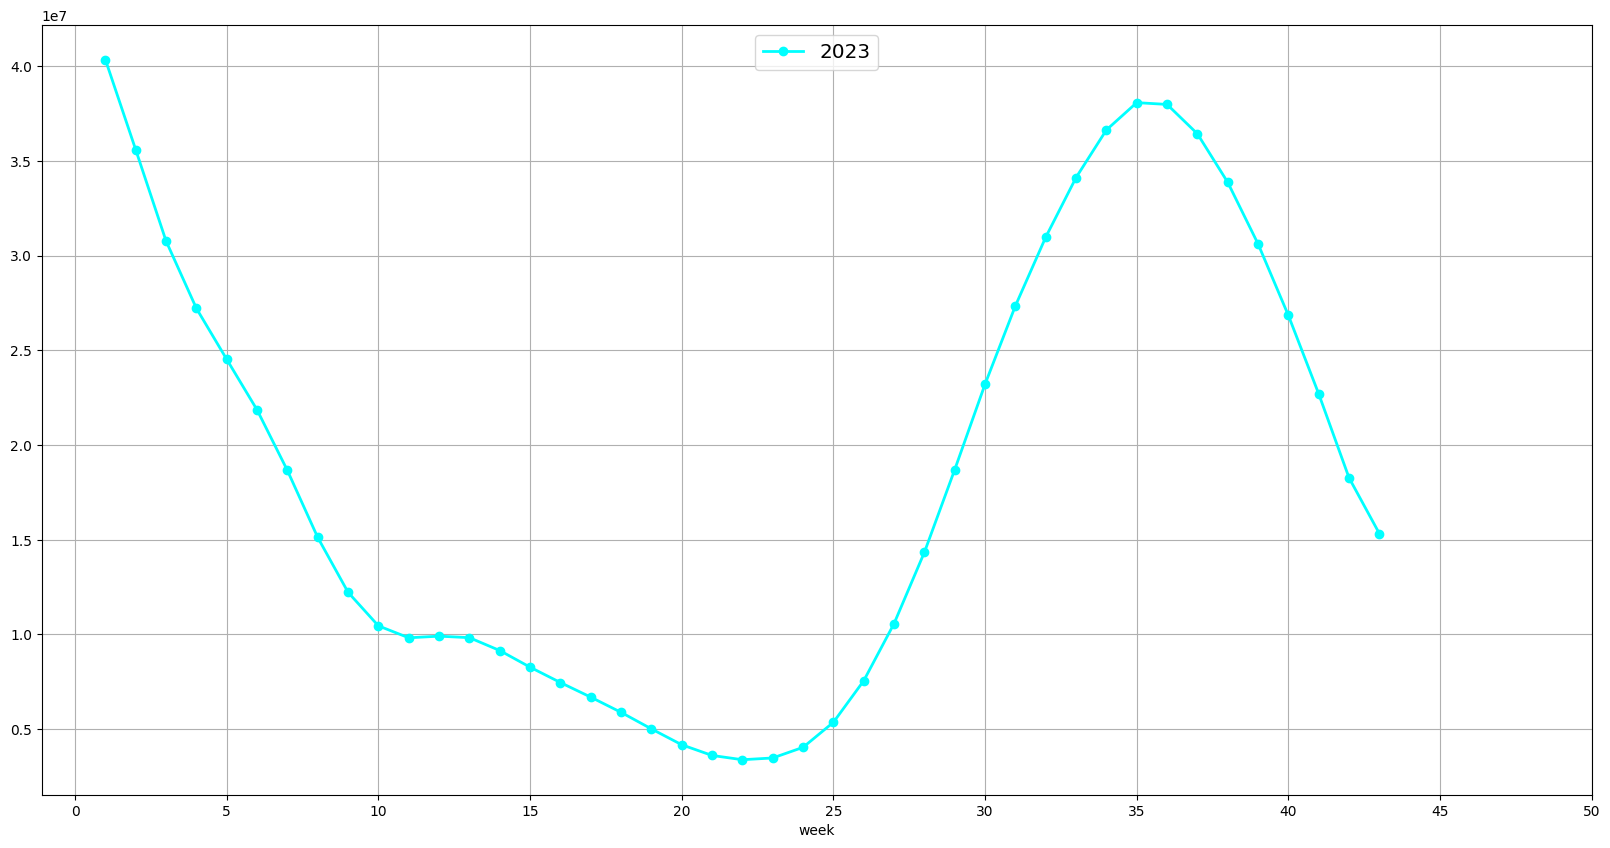

In [187]:
ay = nc_ww_data_pivot.plot(figsize=(20,10), rot=0, grid=True, colormap='cool', lw=2, xticks = [0,5,10,15,20,25,30,35,40,45,50], style='o-')
ay.legend(['2023'], loc=9, fontsize='x-large')